# Arima model for AirPassengers dataset

In [27]:
from pandas import Series
from pandas import datetime
import pandas as pd
from matplotlib import pyplot
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import itertools
import warnings
import numpy as np
import math
from pandas.tools.plotting import autocorrelation_plot
warnings.filterwarnings("ignore")
series = pd.read_csv('C:\\Users\\saikiran\\Downloads\\AirPassengers.csv', sep=",")
print(series.tail(5))

       Month  Passengers
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432


In [2]:
#splitting data to training and validation
split_series = len(series) - 12
trainset, validationset = series[0:split_series], series[split_series:]
print('Dataset %d, Validation %d' % (len(trainset), len(validationset)))
print(validationset)
observed = trainset['Passengers']
observed= np.asarray(observed)
print(type(observed))

Dataset 132, Validation 12
       Month  Passengers
132  1960-01         417
133  1960-02         391
134  1960-03         419
135  1960-04         461
136  1960-05         472
137  1960-06         535
138  1960-07         622
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432
<class 'numpy.ndarray'>


In [3]:
#performing a grid search for various p,d and q values
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
print(seasonal_pdq)


[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [4]:
aic_list=[]
for i in pdq:
    for j in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(observed,order=i,seasonal_order=j,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            aic_list.append(results.aic)
            print('ARIMA{}x{} - AIC:{}'.format(i, j, results.aic))
        except:
            continue
print("minimum aic is:",min(aic_list))

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1575.2927100521529
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1039.3684612710642
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1018.1128824449078
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1008.0082399525209
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:999.1896494904967
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:930.7565628459041
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1670.9731705571571
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1409.630843618917
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1071.9868359596467
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:954.9732785958596
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:962.7908430128998
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:941.9746014541223
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:947.4386036577959
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:876.8976472268058
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1066.5001391578762
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:814.9661546286911
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:901.900047525677
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:882.2776805554882
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:821.6

In [5]:
#training the model with the parameters of least Aic value
model = sm.tsa.statespace.SARIMAX(observed,
                                order=(0,1,1),
                                seasonal_order=(1, 1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()
print("Aic value is :",results.aic)

print(results.summary().tables[1])


Aic value is : 802.858019467
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2380      0.087     -2.735      0.006      -0.409      -0.067
ar.S.L12      -0.6332      0.166     -3.825      0.000      -0.958      -0.309
ma.S.L12       0.5695      0.252      2.263      0.024       0.076       1.063
sigma2       109.1523     17.692      6.170      0.000      74.477     143.828


In [7]:
#predicting the validation dataset
start_index = 132
end_index = 143
forecast = list(results.predict(start=start_index, end=end_index))
print(forecast)

[422.52254411893955, 404.08992408934171, 466.1706832257579, 455.60032702679007, 479.38037144247312, 532.87630370347074, 607.84674857858693, 619.39300905328776, 521.77277883958448, 466.98427677564058, 421.74783753486179, 463.56355308185357]


In [8]:
validationset['forcasted'] = forecast
print(validationset)

       Month  Passengers   forcasted
132  1960-01         417  422.522544
133  1960-02         391  404.089924
134  1960-03         419  466.170683
135  1960-04         461  455.600327
136  1960-05         472  479.380371
137  1960-06         535  532.876304
138  1960-07         622  607.846749
139  1960-08         606  619.393009
140  1960-09         508  521.772779
141  1960-10         461  466.984277
142  1960-11         390  421.747838
143  1960-12         432  463.563553


In [9]:
#calculating the RMSE of the validation set
error = list((validationset['Passengers']-validationset['forcasted'])**2)
RMSE = math.sqrt(sum(error)/len(error))
print("accuracy score for validationset is:",RMSE)

accuracy score for validationset is: 20.6648366657858


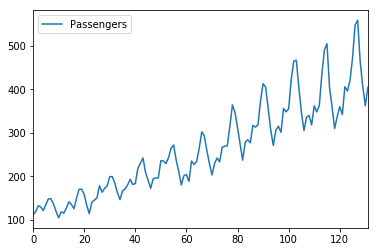

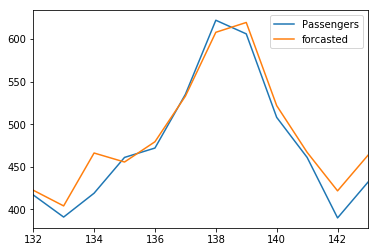

In [10]:
trainset.plot()
validationset.plot()
pyplot.show()

# Arima model for daily minimum temperature dataset

In [11]:
series2 = pd.read_csv('C:\\Users\\saikiran\\Downloads\\daily-minimum-temperatures-in-me.csv', sep=",")
series2 = series2.convert_objects(convert_numeric=True)
series2 = series2.fillna(series2.mean())
print(series2.head(5))

         Date  Daily minimum temperatures in Melbourne, Australia, 1981-1990
0  1981-01-01                                               20.7            
1  1981-01-02                                               17.9            
2  1981-01-03                                               18.8            
3  1981-01-04                                               14.6            
4  1981-01-05                                               15.8            


In [12]:
#splitting the data to training and validation
split_series = len(series2) - 365
trainset, validationset = series2[0:split_series], series2[split_series:]
print('Dataset %d, Validation %d' % (len(trainset), len(validationset)))
#print(validationset)
observed = trainset['Daily minimum temperatures in Melbourne, Australia, 1981-1990']
observed= np.asarray(observed)

print(type(observed))
print(validationset)

Dataset 3285, Validation 365
<class 'numpy.ndarray'>
            Date  \
3285  1990-01-01   
3286  1990-01-02   
3287  1990-01-03   
3288  1990-01-04   
3289  1990-01-05   
3290  1990-01-06   
3291  1990-01-07   
3292  1990-01-08   
3293  1990-01-09   
3294  1990-01-10   
3295  1990-01-11   
3296  1990-01-12   
3297  1990-01-13   
3298  1990-01-14   
3299  1990-01-15   
3300  1990-01-16   
3301  1990-01-17   
3302  1990-01-18   
3303  1990-01-19   
3304  1990-01-20   
3305  1990-01-21   
3306  1990-01-22   
3307  1990-01-23   
3308  1990-01-24   
3309  1990-01-25   
3310  1990-01-26   
3311  1990-01-27   
3312  1990-01-28   
3313  1990-01-29   
3314  1990-01-30   
...          ...   
3620  1990-12-02   
3621  1990-12-03   
3622  1990-12-04   
3623  1990-12-05   
3624  1990-12-06   
3625  1990-12-07   
3626  1990-12-08   
3627  1990-12-09   
3628  1990-12-10   
3629  1990-12-11   
3630  1990-12-12   
3631  1990-12-13   
3632  1990-12-14   
3633  1990-12-15   
3634  1990-12-16   
3635  1

In [13]:
#performing a grid search for various p,d,q values 
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
print(seasonal_pdq)

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [14]:

aic_list=[]
for i in pdq:
    for j in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(observed,order=i,seasonal_order=j,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            aic_list.append(results.aic)
            print('ARIMA{}x{} - AIC:{}'.format(i, j, results.aic))
        except:
            continue
print("minimum aic is:",min(aic_list))

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:22700.06730059949
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:17188.484151618228
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:18136.851451157898
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:17243.18164601652
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:17388.803748028084
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:17183.216987311855
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:22060.33925852189
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:20179.962509588775
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:17370.652743372797
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:16120.980015427076
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:17229.59703702861
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:16166.931679621763
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:16478.92781756854
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:16122.521106778804
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:15939.864120567543
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:15943.970362408214
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:15946.779946886792
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:15938.524297323775
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AI

In [21]:
#training the model with parameters of least AIC values
model = sm.tsa.statespace.SARIMAX(observed,
                                order=(1,1,1),
                                seasonal_order=(0, 0,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()
print("Aic value is :",results.aic)

print(results.summary().tables[1])

Aic value is : 15154.7565712
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4523      0.018     24.514      0.000       0.416       0.488
ma.L1         -0.9183      0.009   -101.729      0.000      -0.936      -0.901
ma.S.L12      -0.0080      0.018     -0.442      0.659      -0.044       0.028
sigma2         6.0120      0.137     43.746      0.000       5.743       6.281


In [23]:
#predicting the validation set
start_index = 3285
end_index = 3649
forecast = list(results.predict(start=start_index, end=end_index))
print(forecast[0])

13.1249869102


In [24]:
validationset['forcasted'] = forecast
print(validationset.head(5))

            Date  \
3285  1990-01-01   
3286  1990-01-02   
3287  1990-01-03   
3288  1990-01-04   
3289  1990-01-05   

      Daily minimum temperatures in Melbourne, Australia, 1981-1990  forcasted  
3285                                               14.8              13.124987  
3286                                               13.3              13.305986  
3287                                               15.6              13.390402  
3288                                               14.5              13.425455  
3289                                               14.3              13.436439  


In [25]:
#calculating the RMSE for the validation set
error = list((validationset['Daily minimum temperatures in Melbourne, Australia, 1981-1990']-validationset['forcasted'])**2)
RMSE = math.sqrt(sum(error)/len(error))
print("accuracy score for validationset is:",RMSE)

accuracy score for validationset is: 4.245413787696782


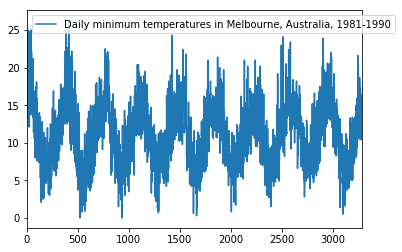

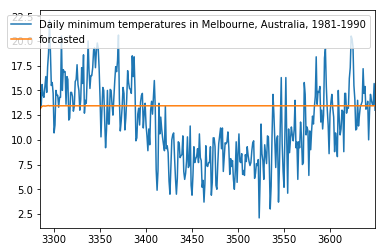

In [28]:
#plotting the graph of dataset
trainset.plot()
validationset.plot()
pyplot.show()